### Experiment with SVR and Coefficient 1

Ideas to test:
    1. train and compare results for RBF SVR model with previous parameters on Dataset 1 and Dataset 4
    2. compare new for RBF SVR model with new parameters Dataset 1 and Dataset 4
    3. compare results from 1 and 2
    4. try some other parameters on Dataset4
    5. analyse mae based on drug basis
    6. analyse errors based on cell line
    7. try not drug-by-drug training but for all drugs at one time
    8. try RFE for better model 
    (but RFE works with feature_importance attribute, but for SVR this option is available only for linear kernel.
    So the idea is to use not optimal linear kernel (it is only 5% worser) 
    and try feture importance on that and then compare the results)
    
Not working ideas - there are many cell lines which are present only once
    9. train cell_line-by-cell_line on Dataset4
    10. train cell_line-by-cell_line on Dataset4 but only with drug features without cell line properties
    11. if it works, K-Means for finding similarities between cell lines

In [1]:
import pandas as pd
import numpy as np
import os
#training
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

_FOLDER2 ="results/"
_FOLDER = "figures/"

In [2]:
def TrainPredict_SVR(train, test, drug_ids_list, target, X_columns, kernel, C, epsilon, coef0 =0, print_drug_name =False):
    y_pred =[]
    for drug_id in drug_ids_list:
        drug_name = train.loc[drug_id, "Drug_Name"].values[0]
        if print_drug_name:
            print(drug_id, drug_name)
        train_drug = train.loc[drug_id,:]
        test_drug = test.loc[drug_id,:]
        y_train_drug = train_drug[target].values
        y_test_drug =  test_drug[target].values
        scaler = MinMaxScaler().fit(train_drug[X_columns])
        Xtrain_drug = scaler.transform(train_drug[X_columns])
        Xtest_drug = scaler.transform(test_drug[X_columns])
    
        model = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
        model.fit(Xtrain_drug, y_train_drug)
        y_pred.extend(model.predict(Xtest_drug))
    return y_pred

In [3]:
with open(_FOLDER2 + "drug_ids_50.txt", 'r') as f:
    drug_ids_50 = [np.int32(line.rstrip('\n')) for line in f]

with open(_FOLDER2+"X_features_cancer_cell_lines.txt", 'r') as f:
    X_cancer_cell_lines = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER2+"X_PubChem_properties.txt", 'r') as f:
    X_PubChem_properties = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER2+"X_features_Targets.txt", 'r') as f:
    X_targets = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER2+"X_features_Target_Pathway.txt", 'r') as f:
    X_target_pathway = [line.rstrip('\n') for line in f]
# *****************************************

all_columns = X_cancer_cell_lines + X_PubChem_properties + X_targets + X_target_pathway +["MAX_CONC"]

train_df = pd.read_csv(_FOLDER2+"train08_merged_fitted_sigmoid4_123_with_drugs_properties_min10.csv").drop(["Unnamed: 0","Unnamed: 0.1"], axis=1)
test_df = pd.read_csv(_FOLDER2+"test02_merged_fitted_sigmoid4_123_with_drugs_properties_min10.csv").drop(["Unnamed: 0","Unnamed: 0.1"], axis=1)               

train_df_50 = train_df.set_index("DRUG_ID").loc[drug_ids_50, :].copy()
test_df_50 = test_df.set_index("DRUG_ID").loc[drug_ids_50, :].copy()

X_feat_dict = {"Dataset_1": X_cancer_cell_lines ,
               "Dataset_2": ["MAX_CONC"] + X_targets + X_target_pathway + X_cancer_cell_lines ,
               "Dataset_3": ["MAX_CONC"] + X_PubChem_properties +  X_cancer_cell_lines,
               "Dataset_4": ["MAX_CONC"] + X_PubChem_properties +  X_targets + X_target_pathway + X_cancer_cell_lines}

In [4]:
#training with previous parameters for Dataset 1 and Datset 4
C = 5.0
coef0 = -0.1
epsilon = 0.1
kernel = "rbf"
X_columns = X_feat_dict["Dataset_1"]

test_df_50["pred1_param_1_df1"] = TrainPredict_SVR(train_df_50, test_df_50, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)

#training with new parameters
C = 0.1
epsilon = 0.001
coef0 = 0.01
kernel = "rbf"
X_columns = X_feat_dict["Dataset_1"]

test_df_50["pred2_param_1_df1"] =  TrainPredict_SVR(train_df_50, test_df_50, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)
#training with previous parameters
C = 5.0
coef0 = 0.1
epsilon = 0.1
kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50["pred1_param_1_df4"] = TrainPredict_SVR(train_df_50, test_df_50, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)
#training with new parameters
C = 0.1
epsilon = 0.001
coef0 = 0.01
kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50["pred2_param_1_df4"] = TrainPredict_SVR(train_df_50, test_df_50, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)
round(test_df_50[["COSMIC_ID", "param_1", "pred1_param_1_df1", "pred2_param_1_df1", "pred1_param_1_df4", "pred2_param_1_df4"]], 3)

,COSMIC_ID,param_1,pred1_param_1_df1,pred2_param_1_df1,pred1_param_1_df4,pred2_param_1_df4
DRUG_ID,,,,,,
170,910907,0.598,0.477,0.461,0.470,0.460
170,906877,0.311,0.476,0.462,0.474,0.461
170,1330931,0.360,0.455,0.457,0.453,0.457
170,753618,0.450,0.409,0.451,0.406,0.452
170,924104,0.486,0.521,0.467,0.514,0.465
...,...,...,...,...,...,...
346,1331033,0.302,0.350,0.366,0.350,0.367
346,1290795,0.303,0.356,0.368,0.356,0.369
346,687997,0.274,0.363,0.368,0.363,0.370


#### Hypothesis 1: No influence of dataset for previous model - FALSE, the difference exists, but is very low

In [5]:
round(test_df_50[["COSMIC_ID", "param_1", "pred1_param_1_df1","pred1_param_1_df4"]],3)

,COSMIC_ID,param_1,pred1_param_1_df1,pred1_param_1_df4
DRUG_ID,,,,
170,910907,0.598,0.477,0.470
170,906877,0.311,0.476,0.474
170,1330931,0.360,0.455,0.453
170,753618,0.450,0.409,0.406
170,924104,0.486,0.521,0.514
...,...,...,...,...
346,1331033,0.302,0.350,0.350
346,1290795,0.303,0.356,0.356
346,687997,0.274,0.363,0.363


In [6]:
d1 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred1_param_1_df1"]), 4)
d4 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred1_param_1_df4"]), 4)
print("Dataset1 results:", d1)
print("Dataset4 results:", d4)
print("Difference in %", round((d1-d4)*100/d1,2))

Dataset1 results: 0.2109
Dataset4 results: 0.2095
Difference in % 0.66


#### Hypothesis 2: No influence of dataset for the new model - FALSE, the difference exists, but is very-very low
The Dataset 1 is a little bit better than the Dataset 4

In [7]:
round(test_df_50[["COSMIC_ID", "param_1", "pred2_param_1_df1","pred2_param_1_df4"]],3)

,COSMIC_ID,param_1,pred2_param_1_df1,pred2_param_1_df4
DRUG_ID,,,,
170,910907,0.598,0.461,0.460
170,906877,0.311,0.462,0.461
170,1330931,0.360,0.457,0.457
170,753618,0.450,0.451,0.452
170,924104,0.486,0.467,0.465
...,...,...,...,...
346,1331033,0.302,0.366,0.367
346,1290795,0.303,0.368,0.369
346,687997,0.274,0.368,0.370


In [8]:
d1 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred2_param_1_df1"]), 4)
d4 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred2_param_1_df4"]), 4)
print("Dataset1 results:", d1)
print("Dataset4 results:", d4)
print("Difference in %", round((d1-d4)*100/d1,2))

Dataset1 results: 0.2076
Dataset4 results: 0.208
Difference in % -0.19


#### Hypothesis 3: No difference between new and previous mode -  FALSE: New model is betterl

In [9]:
print("Dataset 1")
d1 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred1_param_1_df1"]), 4)
d1_2 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred2_param_1_df1"]),4)

print("Previous results:", d1)
print("New results:", d1_2)

print("Difference in %", round((d1-d1_2)*100/d1,2))

Dataset 1
Previous results: 0.2109
New results: 0.2076
Difference in % 1.56


In [10]:
print("Dataset 4")
d4 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred1_param_1_df4"]), 4)
d4_2 = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred2_param_1_df4"]),4)
print("Previous results:", d4)
print("New results:", d4_2 )

print("Difference in %", round((d4-d4_2)*100/d1,2))

Dataset 4
Previous results: 0.2095
New results: 0.208
Difference in % 0.71


#### Hypothesis 4: C is too low in the optimised model -  FALSE: optimised parameter is better regardless low values of C

In [11]:
#training with other parameters

C = 10
epsilon = 0.001
coef0 = 0.01
kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50["pred3_param_1_df4"] = TrainPredict_SVR(train_df_50, test_df_50, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)
round(test_df_50[["COSMIC_ID", "param_1", "pred1_param_1_df4", "pred2_param_1_df4", "pred3_param_1_df4"]], 3)

,COSMIC_ID,param_1,pred1_param_1_df4,pred2_param_1_df4,pred3_param_1_df4
DRUG_ID,,,,,
170,910907,0.598,0.470,0.460,0.543
170,906877,0.311,0.474,0.461,0.439
170,1330931,0.360,0.453,0.457,0.396
170,753618,0.450,0.406,0.452,0.269
170,924104,0.486,0.514,0.465,0.591
...,...,...,...,...,...
346,1331033,0.302,0.350,0.367,0.404
346,1290795,0.303,0.356,0.369,0.332
346,687997,0.274,0.363,0.370,0.384


In [12]:
print("Dataset 4")

low_C = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred2_param_1_df4"]),4)
high_C = round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                     test_df_50.loc[:, "pred3_param_1_df4"]), 4)

print("New model:", low_C )
print("Higher C:", high_C)
print("Difference in %:", round((low_C - high_C)*100/low_C, 2))

Dataset 4
New model: 0.208
Higher C: 0.2177
Difference in %: -4.66


### 5. Analyse MAE for Dataset 4 based on drug basis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mae_errors = np.zeros(len(drug_ids_50))

for i, drug_id in enumerate(drug_ids_50):
    mae = mean_absolute_error(test_df_50.loc[drug_id, "param_1"], 
                              test_df_50.loc[drug_id, "pred2_param_1_df4"])
    mae_errors[i]= mae

mean_mae  = mae_errors.mean()
std_mae = mae_errors.std()
print(round(mean_mae, 3), round(std_mae, 3))

0.237 0.462


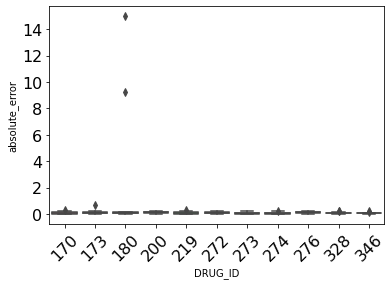

In [15]:
test_df_50["absolute_error"] = abs(test_df_50["param_1"] - test_df_50["pred2_param_1_df4"])

# plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))

sns.boxplot(x = "DRUG_ID", y = "absolute_error", data = test_df_50.reset_index())
plt.xticks(rotation = 45, fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(_FOLDER+"coef1_0_4_1.png", bbox_inches='tight');

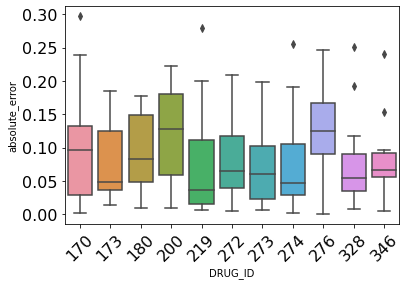

In [16]:
test_df_50["absolute_error"] = abs(test_df_50["param_1"] - test_df_50["pred2_param_1_df4"])

plt.figure(figsize=(6,4))
sns.boxplot(x = "DRUG_ID", y = "absolute_error", data = test_df_50[test_df_50["param_1"]<=1].reset_index())
plt.xticks(rotation = 45, fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(_FOLDER+"coef1_1_4_1.png", bbox_inches='tight');

In [17]:
test_df_50[test_df_50["absolute_error"] >2][["COSMIC_ID", "param_1", "pred2_param_1_df1","pred2_param_1_df4"]]

,COSMIC_ID,param_1,pred2_param_1_df1,pred2_param_1_df4
DRUG_ID,,,,
180,907064,9.576391,0.322436,0.322502
180,905936,15.312320,0.325051,0.324649


In [18]:
test_df_50[test_df_50["param_1"]>8]

,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,fd_num_7,...,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway,pred1_param_1_df1,pred2_param_1_df1,pred1_param_1_df4,pred2_param_1_df4,pred3_param_1_df4,absolute_error
DRUG_ID,,,,,,,,,,,,,,,,,,,,,
180,907064,0.512,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0,0.433196,0.322436,0.423885,0.322502,0.370708,9.253889
180,905936,0.512,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0,0.481620,0.325051,0.462475,0.324649,0.433662,14.987671


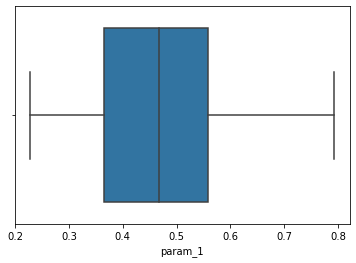

In [19]:
sns.boxplot(test_df_50[test_df_50["param_1"]<1]["param_1"]);

In [20]:
test_df_50["COSMIC_ID"].nunique(), test_df_50.shape

(172, (202, 1385))

### Hypothesis - Removal from train and test set samples where param_1 >1 improve performance - TRUE: mae falls from 0.21 to 0.09

In [21]:
train_df_50_2 = train_df_50[train_df_50["param_1"]<=1].copy()
test_df_50_2 = test_df_50[test_df_50["param_1"]<=1].copy()

train_df_50.shape[0] - train_df_50_2.shape[0], test_df_50.shape[0] - test_df_50_2.shape[0] 

(16, 3)

In [22]:
#training with previous parameters
C = 5.0
coef0 = 0.1
epsilon = 0.1
kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50_2["pred4_param_1_df4"] = TrainPredict_SVR(train_df_50, test_df_50_2, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)

#training with new parameters
C = 0.1
epsilon = 0.001
coef0 = 0.01
kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50_2["pred5_param_1_df4"] = TrainPredict_SVR(train_df_50_2, test_df_50_2, drug_ids_list = drug_ids_50, 
                                                    target = "param_1", X_columns = X_columns, 
                                                    kernel =kernel, C=C, epsilon=epsilon, coef0=coef0)

round(test_df_50_2[["COSMIC_ID", "param_1", "pred1_param_1_df4", "pred2_param_1_df4", "pred4_param_1_df4", "pred5_param_1_df4"]], 3)

,COSMIC_ID,param_1,pred1_param_1_df4,pred2_param_1_df4,pred4_param_1_df4,pred5_param_1_df4
DRUG_ID,,,,,,
170,910907,0.598,0.470,0.460,0.470,0.459
170,906877,0.311,0.474,0.461,0.474,0.459
170,1330931,0.360,0.453,0.457,0.453,0.456
170,753618,0.450,0.406,0.452,0.406,0.452
170,924104,0.486,0.514,0.465,0.514,0.463
...,...,...,...,...,...,...
346,1331033,0.302,0.350,0.367,0.350,0.367
346,1290795,0.303,0.356,0.369,0.356,0.369
346,687997,0.274,0.363,0.370,0.363,0.370


In [23]:
test_df_50_2["absolute_error_2"] = abs(test_df_50_2["param_1"] - test_df_50_2["pred5_param_1_df4"])

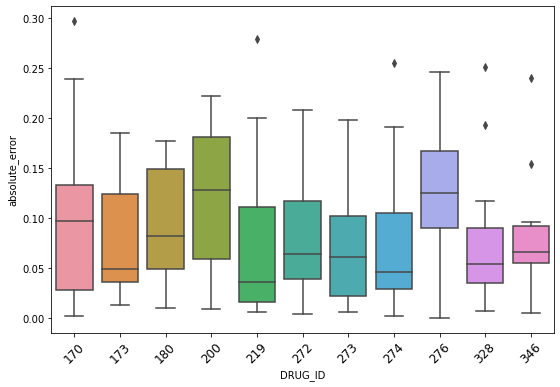

In [24]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "DRUG_ID", y = "absolute_error", data = test_df_50_2.reset_index())
plt.xticks(rotation = 45, fontsize=12);

In [25]:
print("Dataset 4 without param_1 > 1")

print("Old model - old data:", round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred1_param_1_df4"]),3))
print("New model - old data:", round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred2_param_1_df4"]),3))

print("Old model - old predictions:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred1_param_1_df4"]),3))

print("New model - old predictions:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred2_param_1_df4"]),3))

print("Old model - new data:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                     test_df_50_2.loc[:, "pred4_param_1_df4"]), 3))
print("New_model - new data:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                     test_df_50_2.loc[:, "pred5_param_1_df4"]), 3))

Dataset 4 without param_1 > 1
Old model - old data: 0.21
New model - old data: 0.208
Old model - old predictions: 0.088
New model - old predictions: 0.086
Old model - new data: 0.088
New_model - new data: 0.086


### Analysis of errors cell-line-by-cell_line - After removal of 2 outliers, everything is working quite good

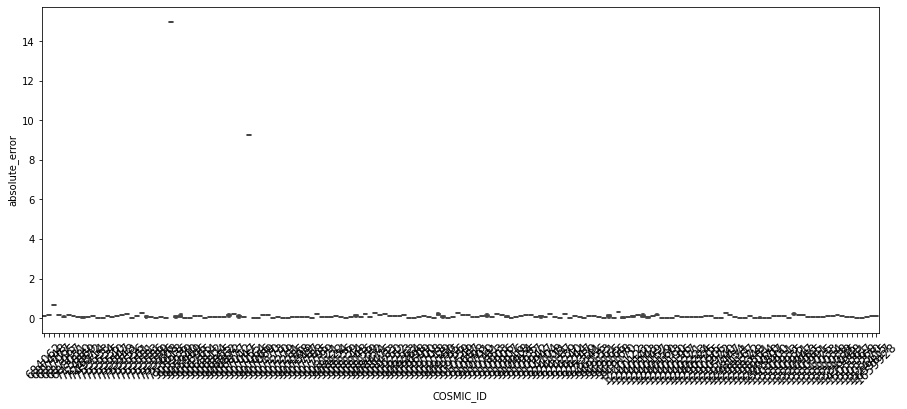

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "COSMIC_ID", y = "absolute_error", data = test_df_50.reset_index())
plt.xticks(rotation = 45, fontsize=12);

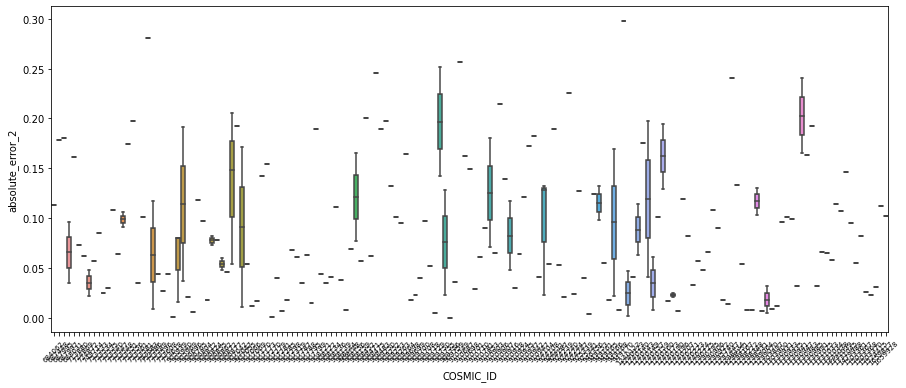

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "COSMIC_ID", y = "absolute_error_2", data = test_df_50_2.reset_index())
plt.xticks(rotation = 45, fontsize=7);

### Training for all the drugs at one time - Training drug-by-drug is more effective

In [28]:
def TrainPresdict_SVR_all_drugs(train, test, target, X_columns, kernel, C, epsilon, coef0):
    y_train = train["param_1"].values
    y_test =  test["param_1"].values
    
    scaler = MinMaxScaler().fit(train[X_columns])
    Xtrain = scaler.transform(train[X_columns])
    Xtest = scaler.transform(test[X_columns])
    
    model = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
    model.fit(Xtrain, y_train)
    y_pred = model.predict(Xtest)
    return y_pred

In [29]:
#training with new parameters and old data
C = 0.1
epsilon = 0.001
coef0 = 0.01

kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]

test_df_50["pred_all_drugs_all_data_param_1_df4"] = TrainPresdict_SVR_all_drugs(train_df_50, test_df_50, 
                                                                                target = "param_1", 
                                                                                X_columns=X_columns, 
                                                                                kernel=kernel, C=C, epsilon=epsilon, coef0= coef0)


round(test_df_50[["COSMIC_ID", "param_1", "pred1_param_1_df4", "pred2_param_1_df4", "pred_all_drugs_all_data_param_1_df4"]], 3)

print("Comparison of MAE")
print("New model - drug-by-drug training:", round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred2_param_1_df4"]),3))

print("New model - training on all drugs:", round(mean_absolute_error(test_df_50.loc[:, "param_1"], 
                                                test_df_50.loc[:, "pred_all_drugs_all_data_param_1_df4"]),3))
print("")

print("All the same but error are calculated for reduced data (param_1)")
test_df_50_2 = test_df_50[test_df_50["param_1"]<=1].copy()

print("New model - drug-by-drug training:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred2_param_1_df4"]),3))

print("New model - training on all drugs:", round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_drugs_all_data_param_1_df4"]),3))

Comparison of MAE
New model - drug-by-drug training: 0.208
New model - training on all drugs: 0.217

All the same but error are calculated for reduced data (param_1)
New model - drug-by-drug training: 0.086
New model - training on all drugs: 0.095


In [30]:
test_df_50_2

,COSMIC_ID,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,fd_num_7,...,RTK signaling,WNT signaling,p53 pathway,pred1_param_1_df1,pred2_param_1_df1,pred1_param_1_df4,pred2_param_1_df4,pred3_param_1_df4,absolute_error,pred_all_drugs_all_data_param_1_df4
DRUG_ID,,,,,,,,,,,,,,,,,,,,,
170,910907,16.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.477300,0.460585,0.469940,0.459769,0.542737,0.138006,0.451634
170,906877,16.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.476170,0.462118,0.474061,0.460985,0.438760,0.150366,0.418236
170,1330931,16.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.455036,0.456950,0.453499,0.456844,0.395889,0.096961,0.425997
170,753618,16.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.409006,0.451232,0.405547,0.452230,0.269135,0.001969,0.451403
170,924104,16.0,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.521074,0.467215,0.514154,0.465146,0.590570,0.020699,0.474564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1331033,2.5,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.349590,0.365596,0.349577,0.367395,0.404224,0.065383,0.397840
346,1290795,2.5,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.356156,0.367830,0.356172,0.369061,0.331969,0.066109,0.420140
346,687997,2.5,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,...,0,0,0,0.362948,0.367946,0.363005,0.369612,0.384041,0.096060,0.415598


In [31]:
#training with new parameters and reduced data
C = 0.1
epsilon = 0.001
coef0 = 0.01

kernel = "rbf"
X_columns = X_feat_dict["Dataset_4"]
test_df_50_2["pred_all_drugs_reduced_data_param_1_df4"] = TrainPresdict_SVR_all_drugs(train_df_50_2, test_df_50_2, 
                                                                                target = "param_1", 
                                                                                X_columns=X_columns, 
                                                                                kernel=kernel, C=C, epsilon=epsilon, coef0= coef0)
common_index = set(test_df_50.reset_index().index)&set(test_df_50_2.reset_index().index)

print("Compare training on all and on reduced data")

d4_2 = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_drugs_all_data_param_1_df4"]),3)
d4_2_all = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.reset_index().loc[common_index, "pred_all_drugs_reduced_data_param_1_df4"]),3)

print("New model - training on all drugs on all data, errors for reduced data:", d4_2)
print("New model - training on all drugs on reduced data, errors for reduced data:", d4_2_all)
print("Difference in %:", round((d4_2-d4_2_all)*100/d4, 2))

Compare training on all and on reduced data
New model - training on all drugs on all data, errors for reduced data: 0.095
New model - training on all drugs on reduced data, errors for reduced data: 0.095
Difference in %: 0.0


### Trying to use RFE

In [32]:
from sklearn.feature_selection import RFE # recursive feature elimination (RFE) 

In [33]:
%%time
# there is no feature_importance attribute for kernels other than linear

C = 0.01
epsilon = 0.001

kernel = "linear"
data_set = "Dataset_4"

y_train_df_50_2 = train_df_50_2["param_1"].values
y_test_df_50_2 =  test_df_50_2["param_1"].values
    
X_columns = X_feat_dict[data_set]
scaler = MinMaxScaler().fit(train_df_50_2[X_columns])
Xtrain_df_50_2 = scaler.transform(train_df_50_2[X_columns])
Xtest_df_50_2 = scaler.transform(test_df_50_2[X_columns])

estimator =SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
selector = RFE(estimator, n_features_to_select=50, step=10)
selector = selector.fit(Xtrain_df_50_2, y_train_df_50_2)

most_important_all = np.array(X_columns)[selector.support_]
len(most_important_all)

CPU times: user 1min 27s, sys: 3.21 s, total: 1min 31s
Wall time: 1min 18s


50

In [34]:
#training with new parameters
C = 0.01
epsilon = 0.001

kernel = "linear"
data_set = "Dataset_4"

y_train_df_50_2 = train_df_50_2["param_1"].values
y_test_df_50_2 =  test_df_50_2["param_1"].values
    
X_columns = X_feat_dict[data_set]
scaler = MinMaxScaler().fit(train_df_50_2[X_columns])
Xtrain_df_50_2 = scaler.transform(train_df_50_2[X_columns])
Xtest_df_50_2 = scaler.transform(test_df_50_2[X_columns])
    
model = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
model.fit(Xtrain_df_50_2, y_train_df_50_2)
y_pred = model.predict(Xtest_df_50_2)
test_df_50_2["pred_all_2_param_1_df4"] = y_pred

In [35]:
C = 0.01
epsilon = 0.001

kernel = "linear"
data_set = "Dataset_4"

y_train_df_50_2 = train_df_50_2["param_1"].values
y_test_df_50_2 =  test_df_50_2["param_1"].values
    
X_columns = most_important_all
scaler = MinMaxScaler().fit(train_df_50_2[X_columns])
Xtrain_df_50_2 = scaler.transform(train_df_50_2[X_columns])
Xtest_df_50_2 = scaler.transform(test_df_50_2[X_columns])
    
model = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
model.fit(Xtrain_df_50_2, y_train_df_50_2)
y_pred = model.predict(Xtest_df_50_2)
test_df_50_2["pred_all_3_param_1_df4"] = y_pred

In [36]:
C = 0.1
epsilon = 0.001
coef0 = 0.01

kernel = "rbf"
data_set = "Dataset_4"

y_train_df_50_2 = train_df_50_2["param_1"].values
y_test_df_50_2 =  test_df_50_2["param_1"].values
    
X_columns = most_important_all

scaler = MinMaxScaler().fit(train_df_50_2[X_columns])
Xtrain_df_50_2 = scaler.transform(train_df_50_2[X_columns])
Xtest_df_50_2 = scaler.transform(test_df_50_2[X_columns])
    
model = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
model.fit(Xtrain_df_50_2, y_train_df_50_2)
y_pred = model.predict(Xtest_df_50_2)
test_df_50_2["pred_all_4_param_1_df4"] = y_pred

In [37]:
d4 = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_2_param_1_df4"]),3)
d4_2 = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_3_param_1_df4"]),3)

d4_3 = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_4_param_1_df4"]),3)

d4_4 = round(mean_absolute_error(test_df_50_2.loc[:, "param_1"], 
                                                test_df_50_2.loc[:, "pred_all_drugs_all_data_param_1_df4"]),3)

print("Linear kernel on all data", d4)
print("Linear kernel with most important features:", d4_2)
print("RBF kernel with all features:", d4_4)
print("RBF kernel with most important features:", d4_3)
print("Difference in %:", round((d4_4-d4_3)*100/d4_4, 2))

Linear kernel on all data 0.096
Linear kernel with most important features: 0.088
RBF kernel with all features: 0.095
RBF kernel with most important features: 0.087
Difference in %: 8.42


In [38]:
most_important_all

array(['complexity', 'bond_stereo_count', 'N', 'F', 'HSP90', 'HDAC6',
       'Protein stability and degradation', 'Cell cycle', 'WNT signaling',
       'ARID2_mut', 'EWSR1-FLI1_mut', 'EZH2_mut', 'MLL2_mut', 'MLL3_mut',
       'NF2_mut', 'PABPC3_mut', 'PGR_mut', 'PIK3CB_mut', 'PLXNB2_mut',
       'USP6_mut', 'XRN1_mut', 'loss:cnaPANCAN20', 'gain:cnaPANCAN60',
       'loss:cnaPANCAN72', 'loss:cnaPANCAN113',
       'loss:cnaPANCAN114 (CIITA)',
       'gain:cnaPANCAN141 (GNAQ,NTRK2,PCSK5,TJP2)', 'loss:cnaPANCAN147',
       'gain:cnaPANCAN165 (CDK4)', 'loss:cnaPANCAN216',
       'loss:cnaPANCAN263', 'loss:cnaPANCAN265', 'loss:cnaPANCAN266',
       'loss:cnaPANCAN267', 'loss:cnaPANCAN282', 'loss:cnaPANCAN285',
       'loss:cnaPANCAN358', 'loss:cnaPANCAN360',
       'gain:cnaPANCAN367 (ARFGAP1,GNAS)', 'gain:cnaPANCAN383',
       'chr1:150266476-150266689(MRPS21)_HypMET',
       'chr1:248020330-248021252()_HypMET',
       'chr1:248100325-248100726(OR2L13)_HypMET',
       'chr10:11059442-110605

In [39]:
features_from_drugs = set(X_PubChem_properties + X_PubChem_properties+ X_targets + X_target_pathway) & set(most_important_all)
len(features_from_drugs)

9

### Most important features among just cell lines

In [40]:
C = 0.01
epsilon = 0.001

kernel = "linear"
data_set = "Dataset_1"

y_train_df_50_2 = train_df_50_2["param_1"].values
y_test_df_50_2 =  test_df_50_2["param_1"].values
    
X_columns = X_feat_dict[data_set]
scaler = MinMaxScaler().fit(train_df_50_2[X_columns])
Xtrain_df_50_2 = scaler.transform(train_df_50_2[X_columns])
Xtest_df_50_2 = scaler.transform(test_df_50_2[X_columns])

estimator = SVR(kernel = kernel, C = C, epsilon = epsilon, coef0 =coef0)
selector = RFE(estimator, n_features_to_select=50, step=10)
selector = selector.fit(Xtrain_df_50_2, y_train_df_50_2)

most_important_cells = np.array(X_columns)[selector.support_]
len(most_important_cells)

50

In [41]:
most_important_cells

array(['ARHGAP29_mut', 'ARID4A_mut', 'CLSPN_mut', 'CREBBP_mut',
       'EWSR1-FLI1_mut', 'F8_mut', 'MLL2_mut', 'MLL3_mut', 'MYH11_mut',
       'MYH9_mut', 'NF1_mut', 'PABPC3_mut', 'PBRM1_mut', 'PGR_mut',
       'PHF6_mut', 'PIK3CB_mut', 'VHL_mut', 'loss:cnaPANCAN20',
       'gain:cnaPANCAN58', 'gain:cnaPANCAN61',
       'gain:cnaPANCAN107 (FUS,TAOK2)', 'loss:cnaPANCAN113',
       'loss:cnaPANCAN114 (CIITA)', 'gain:cnaPANCAN125',
       'loss:cnaPANCAN136', 'loss:cnaPANCAN145 (FANCG,PAX5)',
       'gain:cnaPANCAN177 (IL7R)', 'gain:cnaPANCAN191 (FIP1L1,PDGFRA)',
       'gain:cnaPANCAN248 (EIF4A2,RFC4)', 'loss:cnaPANCAN263',
       'loss:cnaPANCAN265', 'loss:cnaPANCAN294',
       'gain:cnaPANCAN299 (TAOK1)', 'gain:cnaPANCAN351 (NFE2L2)',
       'loss:cnaPANCAN358', 'gain:cnaPANCAN367 (ARFGAP1,GNAS)',
       'gain:cnaPANCAN375', 'loss:cnaPANCAN377',
       'loss:cnaPANCAN381 (ARFGAP3)', 'gain:cnaPANCAN383',
       'gain:cnaPANCAN394 (GNG2,SOS2)',
       'chr10:11059442-11060524(CUGBP2)_Hyp

In [42]:
most_important_common = set(most_important_all) &set(most_important_cells)
len(most_important_common), most_important_common

(17,
 {'EWSR1-FLI1_mut',
  'MLL2_mut',
  'MLL3_mut',
  'PABPC3_mut',
  'PGR_mut',
  'PIK3CB_mut',
  'chr10:11059442-11060524(CUGBP2)_HypMET',
  'chr17:44656490-44657494(ARL17A)_HypMET',
  'chr6:26250436-26250827(HIST1H2BH, HIST1H3F)_HypMET',
  'gain:cnaPANCAN367 (ARFGAP1,GNAS)',
  'gain:cnaPANCAN383',
  'loss:cnaPANCAN113',
  'loss:cnaPANCAN114 (CIITA)',
  'loss:cnaPANCAN20',
  'loss:cnaPANCAN263',
  'loss:cnaPANCAN265',
  'loss:cnaPANCAN358'})

### New GridSearch and training for the data with param_1 <1